#Regressão Linear

##Importando As Bibliotecas

In [ ]:
#Bibliotecas Básicas de Ciência de dados
import pandas as pd #Biblioteca para o tratamento dos dados
import numpy as np #Biblioteca para maninupalação das estruturas de dados
import matplotlib.pyplot as plt2
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px

#Apenas para apresentação abaixo
import matplotlib as plt3
import sklearn as sk
import plotly as plt

##Versão das Bibliotecas Utilizadas

In [ ]:
print(f'''Versão das Bibliotecas: \n
pandas: {pd.__version__}
numpy: {np.__version__}
matplotlib: {plt3.__version__}
seaborn: {sns.__version__}
sklearn: {sk.__version__}
plotly: {plt.__version__}
''')

Versão das Bibliotecas: 

pandas: 1.5.3
numpy: 1.23.5
matplotlib: 3.7.1
seaborn: 0.12.2
sklearn: 1.2.2
plotly: 5.15.0



##Lendo o Dataset

In [ ]:
caminho = '/content/drive/MyDrive/Colab Notebooks/Topicos I/regiao_frete_dias.csv' #Caminho para o arquivo csv regiao_frete_dias
separador = ';' #Separador do arquivo csv
indexColuna = 'Região' #Definição da coluna index
dadosBrutos = pd.read_csv(caminho , sep=separador, index_col=indexColuna) #Obs.: Passar o caminho do arquivo de acordo com seu drive
display(dadosBrutos) #Exibição do DataFrame na variavel dadosBrutos

,Valor do Frete,Dias para Entrega
Região,,
Norte,49.59,20.0
Norte,117.57,3.0
Norte,98.15,7.0
Norte,96.98,6.0
Norte,123.00,6.0
...,...,...
Centro-Oeste,88.72,7.0
Centro-Oeste,66.35,11.0
Centro-Oeste,41.56,22.0


##Trando Dataset orginal, com o recorte das(s) região(ões) desejada(s)

In [ ]:
#considerando somente região sudeste
regiao = ['Sudeste']
dadosTratados = dadosBrutos.loc[regiao]
display(dadosTratados)

,Valor do Frete,Dias para Entrega
Região,,
Sudeste,106.04,8.0
Sudeste,103.51,1.0
Sudeste,82.69,13.0
Sudeste,108.23,4.0
Sudeste,116.11,1.0
...,...,...
Sudeste,84.04,5.0
Sudeste,108.20,4.0
Sudeste,96.42,4.0


##Calculando a correlação

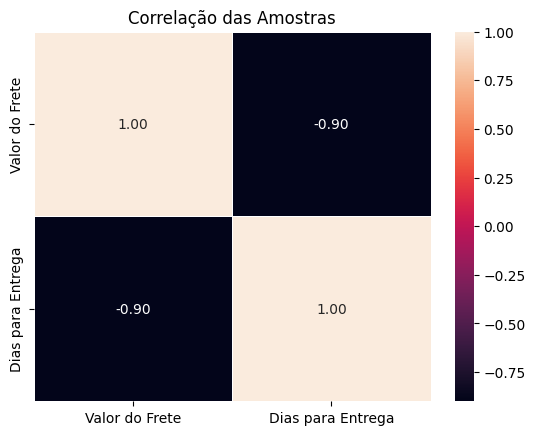

In [ ]:
correlacao = dadosTratados.corr()
eixo = plt2.axes()
sns.heatmap(correlacao,annot=True,fmt=".2f", linewidths=.5,ax=
            eixo)
eixo.set_title("Correlação das Amostras")
plt2.show()
#display(correlacao)

##Tratemento de Dados

###Crianda as variáveis dependente e independentes

In [ ]:
#variável dependente, ou seja, aquela que eu quero calcular
numDias = dadosTratados.iloc[:,1].values

#variável independente, ou seja, aquela utilizada como base para o calculo
valorFrete = dadosTratados.iloc[:,0].values

display(numDias)

array([ 8.,  1., 13.,  4.,  1.,  2., 11.,  1.,  4., 15., 18.,  7.,  6.,
       17.,  9., 20., 16.,  3.,  5., 11.,  2., 18.,  3., 13.,  1., 17.,
        5., 16.,  7.,  4., 10., 15.,  5.,  9., 23., 12.,  9.,  7.,  1.,
        7.,  6.,  4.,  1.,  8.,  1., 13.,  9.,  6.,  2., 11., 11., 10.,
        8.,  1., 13., 16.,  1.,  5.,  4., 19., 12., 10., 13., 12.,  2.,
        3.,  4.,  7.,  8.,  3.,  1., 16.,  2.,  1.,  2.,  5., 15.,  2.,
        8., 11.,  5.,  1., 26.,  4.,  1., 10.,  7., 10.,  7., 13., 11.,
       12., 16., 14.,  2.,  5.,  4.,  4.,  5., 13.])

###Criando a Regressão Linear

In [ ]:
#Criar Matriz com a variavel independente
numDiasMatriz = numDias.reshape(-1,1)

#verificando a forma de matriz da variavel independente
numDiasMatriz.shape

#Variavel que guarda a regressão linear
predicaoCustoFrete = LinearRegression()

#Treinando o modelo de Regressão Linear
predicaoCustoFrete.fit(numDiasMatriz,valorFrete)

#Criando o modelo de previsão
previsaoValores = predicaoCustoFrete.predict(numDiasMatriz)

grafico = px.scatter(x = numDias,y=valorFrete)
grafico.add_scatter(x=numDias,y=previsaoValores,name="Previsão")
grafico.show()

###Formula Da Equação

In [ ]:
alfa = predicaoCustoFrete.intercept_
beta = predicaoCustoFrete.coef_
xy = "Valor do Frete que quero pagar"

print(f"{alfa} + {beta} * {xy}")

116.14944840469985 + [-3.56686557] * Valor do Frete que quero pagar


###Função que indica o prazo

In [ ]:
def  calcularPrazo(prazoDesejado):
  valorFrete = predicaoCustoFrete.predict(prazoDesejado)
  print(f" O prazo é de {valorFrete} Reais")
  valorFrete2 = alfa +(beta[0]*prazoDesejado)
  print(f" O prazo é de {valorFrete2} Reais")

###Calculando Frete

In [ ]:
calcularPrazo(5)

ValueError: ignored

#Avaliando o score da Regressão

In [40]:
#Avaliando score do model
score = predicaoCustoFrete.score(numDiasMatriz,valorFrete)
print(f"O score do modelo é: {score}")

#calcular o Erro do valor Absoluto Médio(mean absolute erro)
erroMedioAbsoluto = mean_absolute_error(valorFrete,previsaoValores)
print(f"O Erro Médio absoluto do modelo é: {erroMedioAbsoluto}")

#calcular o Erro do valor Quadrado Médio(mean squared error)
erroMedioQuadrado = mean_squared_error(valorFrete,previsaoValores)
print(f"O Erro Médio absoluto do modelo é: {erroMedioQuadrado}")

#calcular o Erro do valor Quadrado Médio(mean squared error)
raizErroMedioQuadrado = np.sqrt(mean_squared_error(valorFrete,previsaoValores))
print(f"O Erro Médio absoluto do modelo é: {raizErroMedioQuadrado}")

O score do modelo é: 0.8111671052762233
